In [561]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [562]:
df = pd.read_csv('world-data-2023.csv')
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [563]:
for column in df.columns:
    if df[column].dtype == 'int' or df[column].dtype == 'float':
        print(column,df[column].mode()[0])

Birth Rate 10.0
Calling Code 1.0
Fertility Rate 1.73
Infant mortality 3.1
Life expectancy 76.5
Maternal mortality ratio 5.0
Physicians per thousand 0.08
Latitude -40.900557
Longitude -175.198242


In [564]:
def convert_to_float(series):
    if(type(series) != float):
        converted_series = series.replace(',','').replace('%','').replace('$','')
        return float(converted_series)
    else:
        if not np.isnan(series):
            if float(series):
                return float(series)
            else:
                return np.nan
def convert_to_int(series):
    if(type(series) != int and type(series) != float):
        converted_series = series.replace(',','').replace('%','').replace('$','')
        return int(converted_series)
    else:
        if not np.isnan(series):
            if int(series):
                return int(series)
            else:
                return np.nan

In [565]:
for series in df.columns:
    if df[series].dtype == 'object':
        try:
            df[series] = df[series].apply(convert_to_int)
        except:
            try:
                df[series] = df[series].apply(convert_to_float)
            except:
                df[series] = df[series]
df['Official language'] = df['Official language'].astype('category')
df['Calling Code'] = df['Calling Code'].astype('object')
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        df = df[df[column] != 0]
df.reset_index(drop=True)
df.dtypes

Country                                        object
Density\n(P/Km2)                                int64
Abbreviation                                   object
Agricultural Land( %)                         float64
Land Area(Km2)                                float64
Armed Forces size                             float64
Birth Rate                                    float64
Calling Code                                   object
Capital/Major City                             object
Co2-Emissions                                 float64
CPI                                           float64
CPI Change (%)                                float64
Currency-Code                                  object
Fertility Rate                                float64
Forested Area (%)                             float64
Gasoline Price                                float64
GDP                                           float64
Gross primary education enrollment (%)        float64
Gross tertiary education enr

In [566]:
df_cleaned = df.dropna()
df_cleaned

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
6,Argentina,17,AR,54.3,2780400.0,105000.0,17.02,54.0,Buenos Aires,201348.0,...,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Ukraine,75,UA,71.7,603550.0,297000.0,8.70,380.0,Kyiv,202250.0,...,47.8,2.99,44385155.0,54.2,20.1,45.2,8.88,30835699.0,48.379433,31.165580
185,United Kingdom,281,GB,71.7,243610.0,148000.0,11.00,44.0,London,379025.0,...,14.8,2.81,66834405.0,62.8,25.5,30.6,3.85,55908316.0,55.378051,-3.435973
187,Uruguay,20,UY,82.6,176215.0,22000.0,13.86,598.0,Montevideo,6766.0,...,16.2,5.05,3461734.0,64.0,20.1,41.8,8.73,3303394.0,-32.522779,-55.765835
191,Vietnam,314,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199


In [567]:
for column in df.columns:
    if df_cleaned[column].dtype == 'int64' or df_cleaned[column].dtype == 'float64':
        print(column,df_cleaned[column].mode()[0])
df_cleaned.describe()

Density
(P/Km2) 17
Agricultural Land( %) 17.4
Land Area(Km2) 316.0
Armed Forces size 2000.0
Birth Rate 9.2
Co2-Emissions 495.0
CPI 101.87
CPI Change (%) 2.8
Fertility Rate 1.62
Forested Area (%) 32.7
Gasoline Price 0.71
GDP 1673540300.0
Gross primary education enrollment (%) 104.0
Gross tertiary education enrollment (%) 9.3
Infant mortality 3.6
Life expectancy 76.5
Maternal mortality ratio 17.0
Minimum wage 0.09
Out of pocket health expenditure 12.5
Physicians per thousand 0.07
Population 287025.0
Population: Labor force participation (%) 68.8
Tax revenue (%) 10.2
Total tax rate 36.6
Unemployment rate 2.46
Urban_population 89431.0
Latitude -40.900557
Longitude -106.346771


,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,105.000000,105.000000,1.050000e+02,1.050000e+02,105.000000,1.050000e+02,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,1.050000e+02,105.00000,105.000000,105.000000,105.000000,1.050000e+02,105.000000,105.000000
mean,153.990476,42.605714,8.976160e+05,1.915524e+05,20.220000,2.263276e+05,163.261143,4.902857,2.672381,29.765714,...,36.225714,1.908190,5.922041e+07,61.21619,15.939048,40.481905,6.680952,3.153907e+07,20.967965,23.348092
std,214.229500,19.412084,2.286311e+06,4.360837e+05,10.069845,1.004129e+06,131.579805,8.868619,1.314431,20.632712,...,18.414814,1.614809,1.915985e+08,9.98342,6.255129,14.263258,4.329627,9.604586e+07,24.244177,59.263473
min,2.000000,2.600000,3.160000e+02,1.000000e+03,6.400000,4.950000e+02,101.870000,-3.200000,0.980000,0.400000,...,5.300000,0.010000,2.870250e+05,39.30000,1.400000,9.900000,0.470000,8.943100e+04,-40.900557,-106.346771
25%,40.000000,28.700000,6.530000e+04,1.200000e+04,10.900000,6.766000e+03,116.480000,1.400000,1.650000,11.700000,...,21.700000,0.430000,5.047561e+06,55.10000,11.500000,31.200000,3.850000,2.555552e+06,7.873054,-3.435973
50%,94.000000,43.100000,2.368000e+05,4.000000e+04,17.860000,2.479600e+04,133.610000,2.700000,2.200000,31.100000,...,36.100000,1.560000,1.660403e+07,61.30000,15.100000,38.700000,5.560000,8.099061e+06,20.593684,21.824312
75%,153.000000,56.200000,6.522300e+05,1.800000e+05,28.250000,1.022180e+05,166.200000,4.800000,3.510000,42.800000,...,47.700000,3.010000,4.305305e+07,67.50000,20.100000,48.200000,8.880000,2.539034e+07,40.463667,47.576927
max,1380.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,1344.190000,53.500000,6.910000,90.000000,...,81.600000,7.120000,1.397715e+09,86.10000,37.200000,106.300000,20.000000,8.429340e+08,61.524010,178.065032


Метод работает безотказно, тем не менее значительно сужает выборку(в моём случа - почти вдвое, со с 195 строк до 107). При небольшом количестве NaN-значений вполне применимо. При большом количестве NaN-значений исчезает репрезентативность.

In [568]:
df_clean_median = df.fillna(df.median(numeric_only=True))
for column in df.columns:
    if df_clean_median[column].dtype == 'object' or df_clean_median[column].dtype == 'category':
        df_clean_median[column] = df[column].fillna(df[column].mode()[0])
df_clean_median

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,32000.0,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,62.25,16.3,37.5,5.36,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vanuatu,25,VU,15.3,12189.0,32000.0,29.60,678.0,Port Vila,147.0,...,8.9,0.17,299882.0,69.90,17.8,8.5,4.39,76152.0,-15.376706,166.959158
191,Vietnam,314,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,43.5,0.82,96462106.0,77.40,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,Yemen,56,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,81.0,0.31,29161922.0,38.00,16.3,26.6,12.91,10869523.0,15.552727,48.516388
193,Zambia,25,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,27.5,1.19,17861030.0,74.60,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [569]:
for column in df.columns:
    if df_clean_median[column].dtype == 'int' or df_clean_median[column].dtype == 'float':
        print(column,df_clean_median[column].mode()[0])
df_clean_median.describe()


Agricultural Land( %) 40.3
Land Area(Km2) 2.0
Armed Forces size 32000.0
Birth Rate 18.009999999999998
Calling Code 1.0
Co2-Emissions 12798.0
CPI 124.91
CPI Change (%) 2.3
Fertility Rate 2.22
Forested Area (%) 32.7
Gasoline Price 0.99
GDP 47271463.0
Gross primary education enrollment (%) 102.4
Gross tertiary education enrollment (%) 31.25
Infant mortality 14.3
Life expectancy 73.30000000000001
Maternal mortality ratio 53.0
Minimum wage 1.04
Out of pocket health expenditure 31.950000000000003
Physicians per thousand 1.35
Population 10084.0
Population: Labor force participation (%) 62.25
Tax revenue (%) 16.3
Total tax rate 37.5
Unemployment rate 5.36
Urban_population 4694702.0
Latitude -40.900557
Longitude -175.198242


,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,183.000000,183.000000,1.830000e+02,1.830000e+02,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,...,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000
mean,359.459016,39.849180,7.068369e+05,1.502568e+05,20.166066,357.103825,1.808415e+05,173.966175,5.225683,2.677978,...,33.307377,1.810164,4.124633e+07,62.510109,16.668852,40.879235,6.727158,2.291838e+07,18.975662,21.200219
std,2042.526537,21.008478,1.972943e+06,3.686728e+05,9.788091,325.204458,8.499591e+05,343.763965,15.622284,1.257857,...,18.894448,1.653068,1.491816e+08,9.891010,6.217793,20.246492,4.828951,7.678119e+07,24.033816,67.530875
min,2.000000,0.600000,2.000000e+00,1.000000e+03,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.200000,0.010000,1.008400e+04,38.000000,0.100000,8.000000,0.470000,5.464000e+03,-40.900557,-175.198242
25%,38.500000,23.400000,2.708400e+04,1.500000e+04,11.350000,73.500000,2.867500e+03,114.470000,1.050000,1.700000,...,18.100000,0.360000,2.148924e+06,56.850000,12.550000,30.900000,3.765000,1.289100e+06,4.372880,-6.319850
50%,89.000000,40.300000,1.254540e+05,3.200000e+04,18.010000,254.000000,1.279800e+04,124.910000,2.300000,2.220000,...,31.950000,1.350000,9.187159e+06,62.250000,16.300000,37.500000,5.360000,4.694702e+06,16.864338,21.375567
75%,205.500000,54.850000,5.092450e+05,1.275000e+05,28.695000,506.500000,6.194100e+04,155.605000,3.850000,3.580000,...,44.050000,2.905000,2.997726e+07,68.150000,20.550000,47.800000,8.805000,1.544098e+07,40.106102,48.046657
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,187.900000,6.910000,...,81.600000,8.420000,1.397715e+09,86.100000,37.200000,219.600000,28.180000,8.429340e+08,61.924110,178.065032


Способ не уменьшает количество записей в датафрейме и не приводит к выбросам, так как все новые значения находятся во втором квантиле. Но при этом значения моды могут быть искажены из-за повторяющихся значений. Также влияет на среднее. Не работает с категориальными значениями, их пришлось дополнять модой

In [570]:
df_clean_mean = df.fillna(df.mean(numeric_only=True))
for column in df.columns:
    if df_clean_median[column].dtype == 'object' or df_clean_median[column].dtype == 'category':
        df_clean_median[column] = df[column].fillna(df[column].mode()[0])
df_clean_mean

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.000000,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.900000,9.300000,71.400000,11.120000,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.000000,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.700000,18.600000,36.600000,12.330000,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.000000,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.200000,37.200000,66.100000,11.700000,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,166416.149068,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,62.533333,16.719255,41.074566,6.849226,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.000000,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.500000,9.200000,49.100000,6.890000,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vanuatu,25,VU,15.3,12189.0,166416.149068,29.60,678.0,Port Vila,147.0,...,8.9,0.17,299882.0,69.900000,17.800000,8.500000,4.390000,76152.0,-15.376706,166.959158
191,Vietnam,314,VN,39.3,331210.0,522000.000000,16.75,84.0,Hanoi,192668.0,...,43.5,0.82,96462106.0,77.400000,19.100000,37.600000,2.010000,35332140.0,14.058324,108.277199
192,Yemen,56,YE,44.6,527968.0,40000.000000,30.45,967.0,Sanaa,10609.0,...,81.0,0.31,29161922.0,38.000000,16.719255,26.600000,12.910000,10869523.0,15.552727,48.516388
193,Zambia,25,ZM,32.1,752618.0,16000.000000,36.19,260.0,Lusaka,5141.0,...,27.5,1.19,17861030.0,74.600000,16.200000,15.600000,11.430000,7871713.0,-13.133897,27.849332


In [571]:
for column in df_clean_mean.columns:
    if df_clean_mean[column].dtype == 'int' or df_clean_mean[column].dtype == 'float':
        print(column,df_clean_mean[column].mode()[0])
df_clean_mean.describe()

Agricultural Land( %) 39.833898305084745
Land Area(Km2) 2.0
Armed Forces size 166416.149068323
Birth Rate 20.226629213483147
Co2-Emissions 185561.84831460673
CPI 178.3461904761905
CPI Change (%) 5.468047337278106
Fertility Rate 2.693502824858757
Forested Area (%) 32.731073446327684
Gasoline Price 1.0175903614457833
GDP 47271463.0
Gross primary education enrollment (%) 102.7542372881356
Gross tertiary education enrollment (%) 38.28197674418604
Infant mortality 21.258426966292134
Life expectancy 72.24431818181819
Maternal mortality ratio 158.53216374269005
Minimum wage 2.2191608391608395
Out of pocket health expenditure 33.34550561797753
Physicians per thousand 1.8257627118644066
Population 10084.0
Population: Labor force participation (%) 62.53333333333334
Tax revenue (%) 16.71925465838509
Total tax rate 41.07456647398844
Unemployment rate 6.849226190476189
Urban_population 23325613.6424581
Latitude -40.900557
Longitude -175.198242


,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,183.000000,183.000000,1.830000e+02,1.830000e+02,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000
mean,359.459016,39.833898,7.100313e+05,1.664161e+05,20.226629,1.855618e+05,178.346190,5.468047,2.693503,32.731073,...,33.345506,1.825763,4.142248e+07,62.533333,16.719255,41.074566,6.849226,2.332561e+07,18.987262,21.199256
std,2042.526537,21.008313,1.972470e+06,3.660576e+05,9.781382,8.494898e+05,343.449583,15.599448,1.255012,22.896677,...,18.893071,1.650883,1.491626e+08,9.890703,6.216289,20.230095,4.811545,7.673258e+07,24.033304,67.530874
min,2.000000,0.600000,2.000000e+00,1.000000e+03,5.900000,1.100000e+01,99.030000,-4.300000,0.980000,0.100000,...,0.200000,0.010000,1.008400e+04,38.000000,0.100000,8.000000,0.470000,5.464000e+03,-40.900557,-175.198242
25%,38.500000,23.400000,2.708400e+04,1.500000e+04,11.350000,2.867500e+03,114.470000,1.050000,1.700000,12.600000,...,18.100000,0.360000,2.148924e+06,56.850000,12.550000,30.900000,3.765000,1.289100e+06,4.372880,-6.319850
50%,89.000000,39.833898,1.303700e+05,4.600000e+04,18.250000,1.659000e+04,129.780000,2.600000,2.270000,32.731073,...,32.200000,1.560000,9.321018e+06,62.533333,16.719255,38.100000,5.650000,4.717305e+06,17.189877,21.199256
75%,205.500000,54.850000,5.205440e+05,1.664161e+05,28.695000,8.503400e+04,173.300000,5.468047,3.580000,47.500000,...,44.050000,2.905000,3.130895e+07,68.150000,20.550000,47.800000,8.805000,1.680491e+07,40.106102,48.046657
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,4583.710000,187.900000,6.910000,98.300000,...,81.600000,8.420000,1.397715e+09,86.100000,37.200000,219.600000,28.180000,8.429340e+08,61.924110,178.065032


Метод, заполняющий NaN'ы уже не медианой, а средним. Также влияет на общее среднее и может повлиять на моду. Не работает с категориальными значениями

In [572]:
df_clean_mode = df
for column in df.columns:
    df_clean_mode[column] = df[column].fillna(df[column].mode()[0])
df_clean_mode

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,2000.0,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,65.1,19.5,36.6,4.59,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vanuatu,25,VU,15.3,12189.0,2000.0,29.60,678.0,Port Vila,147.0,...,8.9,0.17,299882.0,69.9,17.8,8.5,4.39,76152.0,-15.376706,166.959158
191,Vietnam,314,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,Yemen,56,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,81.0,0.31,29161922.0,38.0,19.5,26.6,12.91,10869523.0,15.552727,48.516388
193,Zambia,25,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [573]:
df_clean_mode.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,183.000000,183.000000,1.830000e+02,1.830000e+02,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,...,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000
mean,359.459016,39.098361,7.061514e+05,1.466503e+05,19.947213,357.103825,1.804958e+05,171.887486,5.187432,2.661913,...,32.849727,1.768525,4.119618e+07,62.743716,17.053552,40.830055,6.664044,2.281588e+07,18.660007,20.126045
std,2042.526537,21.386839,1.973168e+06,3.699635e+05,9.923211,325.204458,8.500304e+05,344.132808,15.630054,1.266750,...,19.124502,1.680058,1.491940e+08,9.915869,6.282085,20.255783,4.851510,7.680872e+07,24.437642,69.073836
min,2.000000,0.600000,2.000000e+00,1.000000e+03,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.200000,0.010000,1.008400e+04,38.000000,0.100000,8.000000,0.470000,5.464000e+03,-40.900557,-175.198242
25%,38.500000,21.600000,2.602550e+04,6.500000e+03,10.675000,73.500000,2.019000e+03,111.005000,1.050000,1.700000,...,16.900000,0.265000,2.106607e+06,56.850000,12.550000,30.900000,3.765000,1.140078e+06,4.064895,-7.658537
50%,89.000000,39.500000,1.205380e+05,2.500000e+04,17.800000,254.000000,1.098300e+04,121.640000,2.100000,2.200000,...,30.500000,1.270000,9.053300e+06,63.600000,17.800000,37.000000,4.810000,4.418218e+06,16.538800,21.005859
75%,205.500000,54.850000,5.092450e+05,1.275000e+05,28.695000,506.500000,6.194100e+04,155.605000,3.850000,3.580000,...,44.050000,2.905000,2.997726e+07,68.150000,20.550000,47.800000,8.805000,1.544098e+07,40.106102,48.046657
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,187.900000,6.910000,...,81.600000,8.420000,1.397715e+09,86.100000,37.200000,219.600000,28.180000,8.429340e+08,61.924110,178.065032


Заполняет недостающие значения модой. Работает лучше для категориальных значений.

In [574]:
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column].astype('int')
    elif df[column].dtype == 'float64':
        df[column].astype('float')
    else:
        continue
df.dtypes

interpolated_df = df

for column in df.columns:
    if df[column].dtype != 'category':
        interpolated_df[column] = df[column].interpolate()

interpolated_df

C:\Temp\ipykernel_6864\3357508959.py:14: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_df[column] = df[column].interpolate()


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,2000.0,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,65.1,19.5,36.6,4.59,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vanuatu,25,VU,15.3,12189.0,2000.0,29.60,678.0,Port Vila,147.0,...,8.9,0.17,299882.0,69.9,17.8,8.5,4.39,76152.0,-15.376706,166.959158
191,Vietnam,314,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,Yemen,56,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,81.0,0.31,29161922.0,38.0,19.5,26.6,12.91,10869523.0,15.552727,48.516388
193,Zambia,25,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [575]:
for column in df.columns:
    if interpolated_df[column].dtype == 'int' or interpolated_df[column].dtype == 'float':
        print(column,interpolated_df[column].mode()[0])
interpolated_df.describe()

Agricultural Land( %) 17.4
Land Area(Km2) 2.0
Armed Forces size 2000.0
Birth Rate 10.0
Calling Code 1.0
Co2-Emissions 143.0
CPI 99.55
CPI Change (%) 1.8
Fertility Rate 1.73
Forested Area (%) 12.6
Gasoline Price 0.71
GDP 47271463.0
Gross primary education enrollment (%) 100.9
Gross tertiary education enrollment (%) 10.2
Infant mortality 3.1
Life expectancy 76.5
Maternal mortality ratio 5.0
Minimum wage 0.41
Out of pocket health expenditure 15.2
Physicians per thousand 0.08
Population 10084.0
Population: Labor force participation (%) 65.1
Tax revenue (%) 19.5
Total tax rate 36.6
Unemployment rate 4.59
Urban_population 5464.0
Latitude -40.900557
Longitude -175.198242


,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,183.000000,183.000000,1.830000e+02,1.830000e+02,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,...,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000
mean,359.459016,39.098361,7.061514e+05,1.466503e+05,19.947213,357.103825,1.804958e+05,171.887486,5.187432,2.661913,...,32.849727,1.768525,4.119618e+07,62.743716,17.053552,40.830055,6.664044,2.281588e+07,18.660007,20.126045
std,2042.526537,21.386839,1.973168e+06,3.699635e+05,9.923211,325.204458,8.500304e+05,344.132808,15.630054,1.266750,...,19.124502,1.680058,1.491940e+08,9.915869,6.282085,20.255783,4.851510,7.680872e+07,24.437642,69.073836
min,2.000000,0.600000,2.000000e+00,1.000000e+03,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.200000,0.010000,1.008400e+04,38.000000,0.100000,8.000000,0.470000,5.464000e+03,-40.900557,-175.198242
25%,38.500000,21.600000,2.602550e+04,6.500000e+03,10.675000,73.500000,2.019000e+03,111.005000,1.050000,1.700000,...,16.900000,0.265000,2.106607e+06,56.850000,12.550000,30.900000,3.765000,1.140078e+06,4.064895,-7.658537
50%,89.000000,39.500000,1.205380e+05,2.500000e+04,17.800000,254.000000,1.098300e+04,121.640000,2.100000,2.200000,...,30.500000,1.270000,9.053300e+06,63.600000,17.800000,37.000000,4.810000,4.418218e+06,16.538800,21.005859
75%,205.500000,54.850000,5.092450e+05,1.275000e+05,28.695000,506.500000,6.194100e+04,155.605000,3.850000,3.580000,...,44.050000,2.905000,2.997726e+07,68.150000,20.550000,47.800000,8.805000,1.544098e+07,40.106102,48.046657
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,187.900000,6.910000,...,81.600000,8.420000,1.397715e+09,86.100000,37.200000,219.600000,28.180000,8.429340e+08,61.924110,178.065032


Метод, основанный на предсказании данных на основе уже существующих. В теории, это должно влиять как на моду и медианы, так и на другие аспекты. Не работает с категориальными переменными

In [576]:
for column in df.columns:
    if df[column].dtype == 'int' or df[column].dtype == 'float':
        print(column,df[column].mode()[0])
df.describe()

Agricultural Land( %) 17.4
Land Area(Km2) 2.0
Armed Forces size 2000.0
Birth Rate 10.0
Calling Code 1.0
Co2-Emissions 143.0
CPI 99.55
CPI Change (%) 1.8
Fertility Rate 1.73
Forested Area (%) 12.6
Gasoline Price 0.71
GDP 47271463.0
Gross primary education enrollment (%) 100.9
Gross tertiary education enrollment (%) 10.2
Infant mortality 3.1
Life expectancy 76.5
Maternal mortality ratio 5.0
Minimum wage 0.41
Out of pocket health expenditure 15.2
Physicians per thousand 0.08
Population 10084.0
Population: Labor force participation (%) 65.1
Tax revenue (%) 19.5
Total tax rate 36.6
Unemployment rate 4.59
Urban_population 5464.0
Latitude -40.900557
Longitude -175.198242


,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,183.000000,183.000000,1.830000e+02,1.830000e+02,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,...,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000
mean,359.459016,39.098361,7.061514e+05,1.466503e+05,19.947213,357.103825,1.804958e+05,171.887486,5.187432,2.661913,...,32.849727,1.768525,4.119618e+07,62.743716,17.053552,40.830055,6.664044,2.281588e+07,18.660007,20.126045
std,2042.526537,21.386839,1.973168e+06,3.699635e+05,9.923211,325.204458,8.500304e+05,344.132808,15.630054,1.266750,...,19.124502,1.680058,1.491940e+08,9.915869,6.282085,20.255783,4.851510,7.680872e+07,24.437642,69.073836
min,2.000000,0.600000,2.000000e+00,1.000000e+03,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,...,0.200000,0.010000,1.008400e+04,38.000000,0.100000,8.000000,0.470000,5.464000e+03,-40.900557,-175.198242
25%,38.500000,21.600000,2.602550e+04,6.500000e+03,10.675000,73.500000,2.019000e+03,111.005000,1.050000,1.700000,...,16.900000,0.265000,2.106607e+06,56.850000,12.550000,30.900000,3.765000,1.140078e+06,4.064895,-7.658537
50%,89.000000,39.500000,1.205380e+05,2.500000e+04,17.800000,254.000000,1.098300e+04,121.640000,2.100000,2.200000,...,30.500000,1.270000,9.053300e+06,63.600000,17.800000,37.000000,4.810000,4.418218e+06,16.538800,21.005859
75%,205.500000,54.850000,5.092450e+05,1.275000e+05,28.695000,506.500000,6.194100e+04,155.605000,3.850000,3.580000,...,44.050000,2.905000,2.997726e+07,68.150000,20.550000,47.800000,8.805000,1.544098e+07,40.106102,48.046657
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,187.900000,6.910000,...,81.600000,8.420000,1.397715e+09,86.100000,37.200000,219.600000,28.180000,8.429340e+08,61.924110,178.065032


Поиск выбросов и аномалий


Z-оценка(Она же метод среднего)

In [577]:
df_mean_method = interpolated_df
for column in df_mean_method.columns:
    if df_mean_method[column].dtype == 'int64' or df_mean_method[column].dtype == 'float64':
        mean = df_mean_method[column].mean()
        std = df_mean_method[column].std()
        df_mean_method = df_mean_method[(df_mean_method[column] >= mean - 3*std) & (df_mean_method[column] <= mean + 3*std)]
df_mean_method

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
3,Andorra,164,AD,40.0,468.0,2000.0,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,65.1,19.5,36.6,4.59,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
7,Armenia,104,AM,58.9,29743.0,49000.0,13.99,374.0,Yerevan,5156.0,...,81.6,4.40,2957731.0,55.6,20.9,22.6,16.99,1869848.0,40.069099,45.038189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vanuatu,25,VU,15.3,12189.0,2000.0,29.60,678.0,Port Vila,147.0,...,8.9,0.17,299882.0,69.9,17.8,8.5,4.39,76152.0,-15.376706,166.959158
191,Vietnam,314,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,Yemen,56,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,81.0,0.31,29161922.0,38.0,19.5,26.6,12.91,10869523.0,15.552727,48.516388
193,Zambia,25,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [578]:
df_mean_method.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,128.000000,128.000000,1.280000e+02,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,1.280000e+02,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000,128.000000
mean,175.820312,37.475000,2.538437e+05,54632.81250,20.170469,403.171875,30688.828125,134.402422,2.936719,2.684219,...,32.503125,1.612734,1.273438e+07,63.564844,17.319531,38.171094,6.234844,6.193312e+06,17.970410,16.890887
std,304.455301,21.151933,4.253284e+05,95664.01763,9.708375,302.162680,58007.675536,38.789982,3.843470,1.231230,...,18.339038,1.546223,1.920000e+07,9.776749,5.763994,14.042602,4.361884,8.228452e+06,23.847543,71.116153
min,2.000000,0.600000,2.000000e+00,1000.00000,7.200000,1.000000,11.000000,99.030000,-3.200000,1.230000,...,0.200000,0.010000,1.008400e+04,38.000000,0.100000,8.000000,0.580000,5.464000e+03,-40.900557,-175.198242
25%,39.750000,21.050000,1.674150e+04,3750.00000,10.637500,223.750000,1325.500000,110.507500,1.000000,1.725000,...,18.925000,0.207500,1.063318e+06,58.700000,13.600000,30.025000,3.470000,4.613678e+05,3.740173,-10.885574
50%,85.500000,35.400000,8.123350e+04,18000.00000,18.395000,357.500000,7843.500000,120.260000,2.000000,2.260000,...,31.350000,1.150000,6.137612e+06,64.550000,18.200000,36.600000,4.590000,3.198066e+06,14.838393,20.587095
75%,148.250000,51.775000,3.253132e+05,48250.00000,28.820000,616.000000,31945.500000,148.865000,3.300000,3.597500,...,43.700000,2.785000,1.505819e+07,68.800000,20.250000,45.875000,7.232500,8.167894e+06,40.087601,47.505556
max,2239.000000,82.600000,2.724900e+06,522000.00000,41.540000,998.000000,299037.000000,294.660000,23.600000,5.920000,...,81.600000,6.350000,1.120787e+08,83.800000,32.400000,83.700000,20.710000,3.909568e+07,61.924110,178.065032


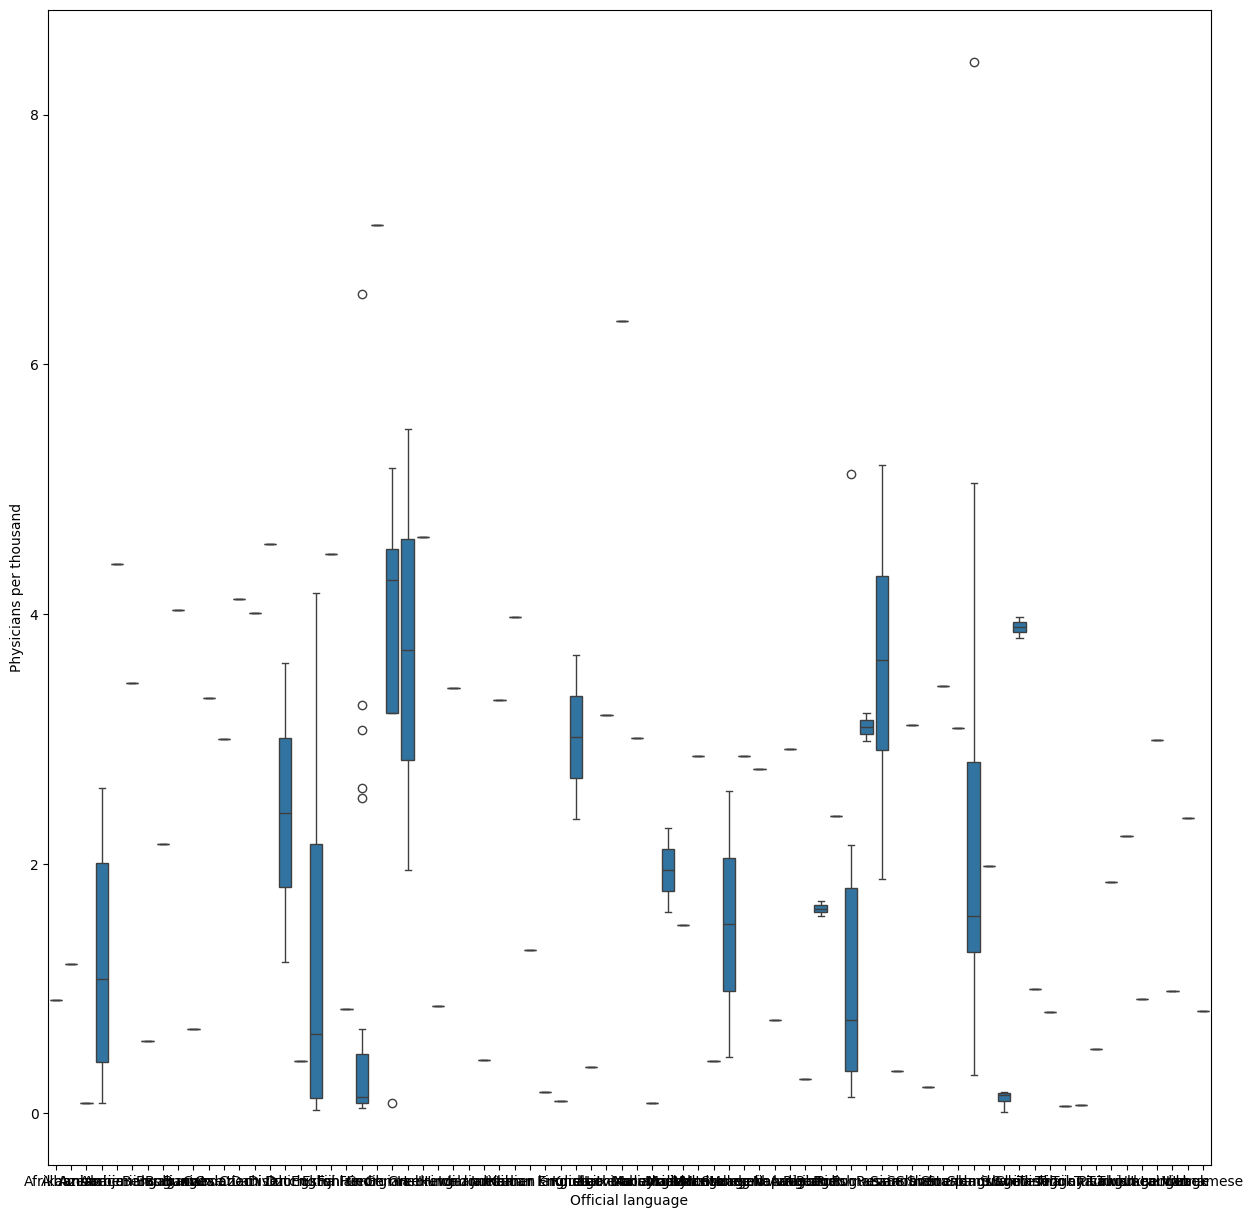

In [579]:
plt.figure(figsize=(15,15))
sns.boxplot(x = interpolated_df['Official language'], y = interpolated_df['Physicians per thousand'])
plt.show()

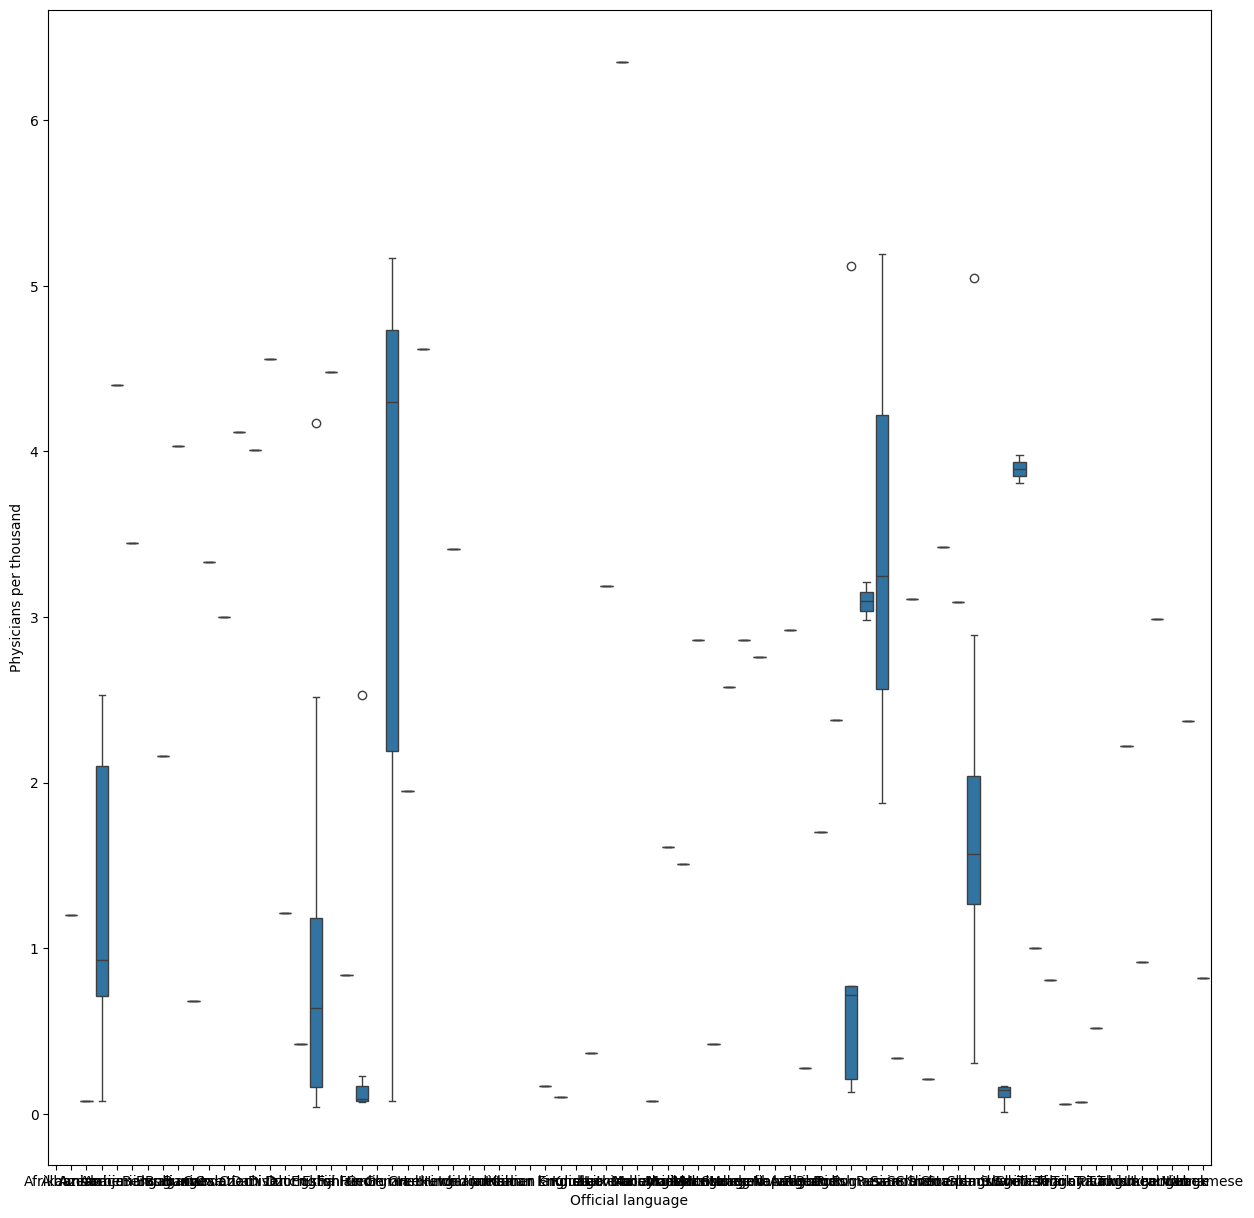

In [580]:
plt.figure(figsize=(15,15))
sns.boxplot(x = df_mean_method['Official language'], y = df_mean_method['Physicians per thousand'])
plt.show()

Методом Межквартального размаха

In [581]:
df_iqr = interpolated_df
for column in df_iqr.columns:
    if df_iqr[column].dtype == 'int64' or df_iqr[column].dtype == 'float64':
        q1 = df_iqr[column].quantile(0.25)
        q3 = df_iqr[column].quantile(0.75)
        iqr = q3-q1
        df_iqr = df_iqr[(df_iqr[column] > q1 - 1.5*iqr) & (df_iqr[column] < q3 + 1.5*iqr)]
df_iqr

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
7,Armenia,104,AM,58.9,29743.0,49000.0,13.99,374.0,Yerevan,5156.0,...,81.6,4.40,2957731.0,55.6,20.9,22.6,16.99,1869848.0,40.069099,45.038189
19,Bhutan,20,BT,13.6,38394.0,6000.0,17.26,975.0,Thimphu,1261.0,...,19.8,0.42,727145.0,66.7,16.0,35.3,2.34,317538.0,27.514162,90.433601
22,Botswana,4,BW,45.6,581730.0,9000.0,24.82,267.0,Gaborone,6340.0,...,5.3,0.37,2346179.0,70.8,19.5,25.1,18.19,1616550.0,-22.328474,24.684866
24,Brunei,83,BN,2.7,5765.0,8000.0,14.90,673.0,Bandar Seri Begawan,7664.0,...,6.0,1.61,433285.0,64.7,19.5,8.0,9.12,337711.0,4.535277,114.727669
25,Bulgaria,64,BG,46.3,110879.0,31000.0,8.90,359.0,Sofia,41708.0,...,47.7,4.03,6975761.0,55.4,20.2,28.3,4.34,5256027.0,42.733883,25.485830
29,Cape Verde,138,CV,19.6,4033.0,1000.0,19.49,238.0,Praia,543.0,...,23.2,0.77,483628.0,60.5,20.1,37.5,12.25,364029.0,16.538800,-23.041800
40,Costa Rica,100,CR,34.5,51100.0,10000.0,13.97,506.0,San Jos������,8023.0,...,21.5,2.89,5047561.0,62.1,13.6,58.3,11.85,4041885.0,9.748917,-83.753428
41,Croatia,73,HR,27.6,56594.0,18000.0,9.00,385.0,Zagreb,17488.0,...,15.2,3.00,4067500.0,51.2,22.0,20.5,6.93,2328318.0,45.100000,15.200000
43,Cyprus,131,CY,12.2,9251.0,16000.0,10.46,357.0,Nicosia,6626.0,...,43.9,1.95,1198575.0,63.1,24.5,22.4,7.27,800708.0,35.126413,33.429859


In [582]:
df_iqr.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,3.700000e+01,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000
mean,124.216216,33.229730,69009.135135,12540.540541,16.344324,440.459459,10268.756757,120.300270,1.764865,2.166757,...,31.432432,1.815946,2.567163e+06,62.464865,19.683784,34.991892,7.759189,1.481654e+06,21.967059,12.280221
std,108.241021,18.009209,125192.272000,13483.723922,6.609651,270.358568,16077.806082,19.459715,1.257028,0.755223,...,19.461230,1.531086,2.671097e+06,4.808859,2.556638,12.786503,4.963143,1.678923e+06,22.220630,84.559408
min,4.000000,2.700000,26.000000,1000.000000,8.900000,1.000000,11.000000,99.030000,-1.000000,1.330000,...,0.200000,0.080000,1.164600e+04,51.200000,13.600000,8.000000,2.340000,5.464000e+03,-22.328474,-157.376832
25%,47.000000,19.600000,4033.000000,2000.000000,10.600000,357.000000,268.000000,104.570000,1.000000,1.620000,...,18.400000,0.660000,2.998820e+05,59.500000,18.200000,28.300000,4.590000,6.448900e+04,8.537981,-61.287228
50%,89.000000,30.400000,25713.000000,6000.000000,13.990000,389.000000,5156.000000,116.190000,1.800000,1.890000,...,30.500000,1.410000,1.394973e+06,64.500000,19.500000,36.600000,5.390000,7.419440e+05,15.414999,20.168331
75%,147.000000,43.100000,65300.000000,18000.000000,20.640000,670.000000,9813.000000,129.180000,2.600000,2.460000,...,43.900000,2.890000,4.246439e+06,65.100000,20.900000,39.100000,11.850000,2.362644e+06,41.608635,45.038189
max,393.000000,76.400000,581730.000000,49000.000000,29.600000,996.000000,70630.000000,167.180000,5.400000,4.050000,...,81.600000,6.350000,9.746117e+06,70.800000,25.400000,65.900000,20.710000,5.626433e+06,58.595272,178.065032


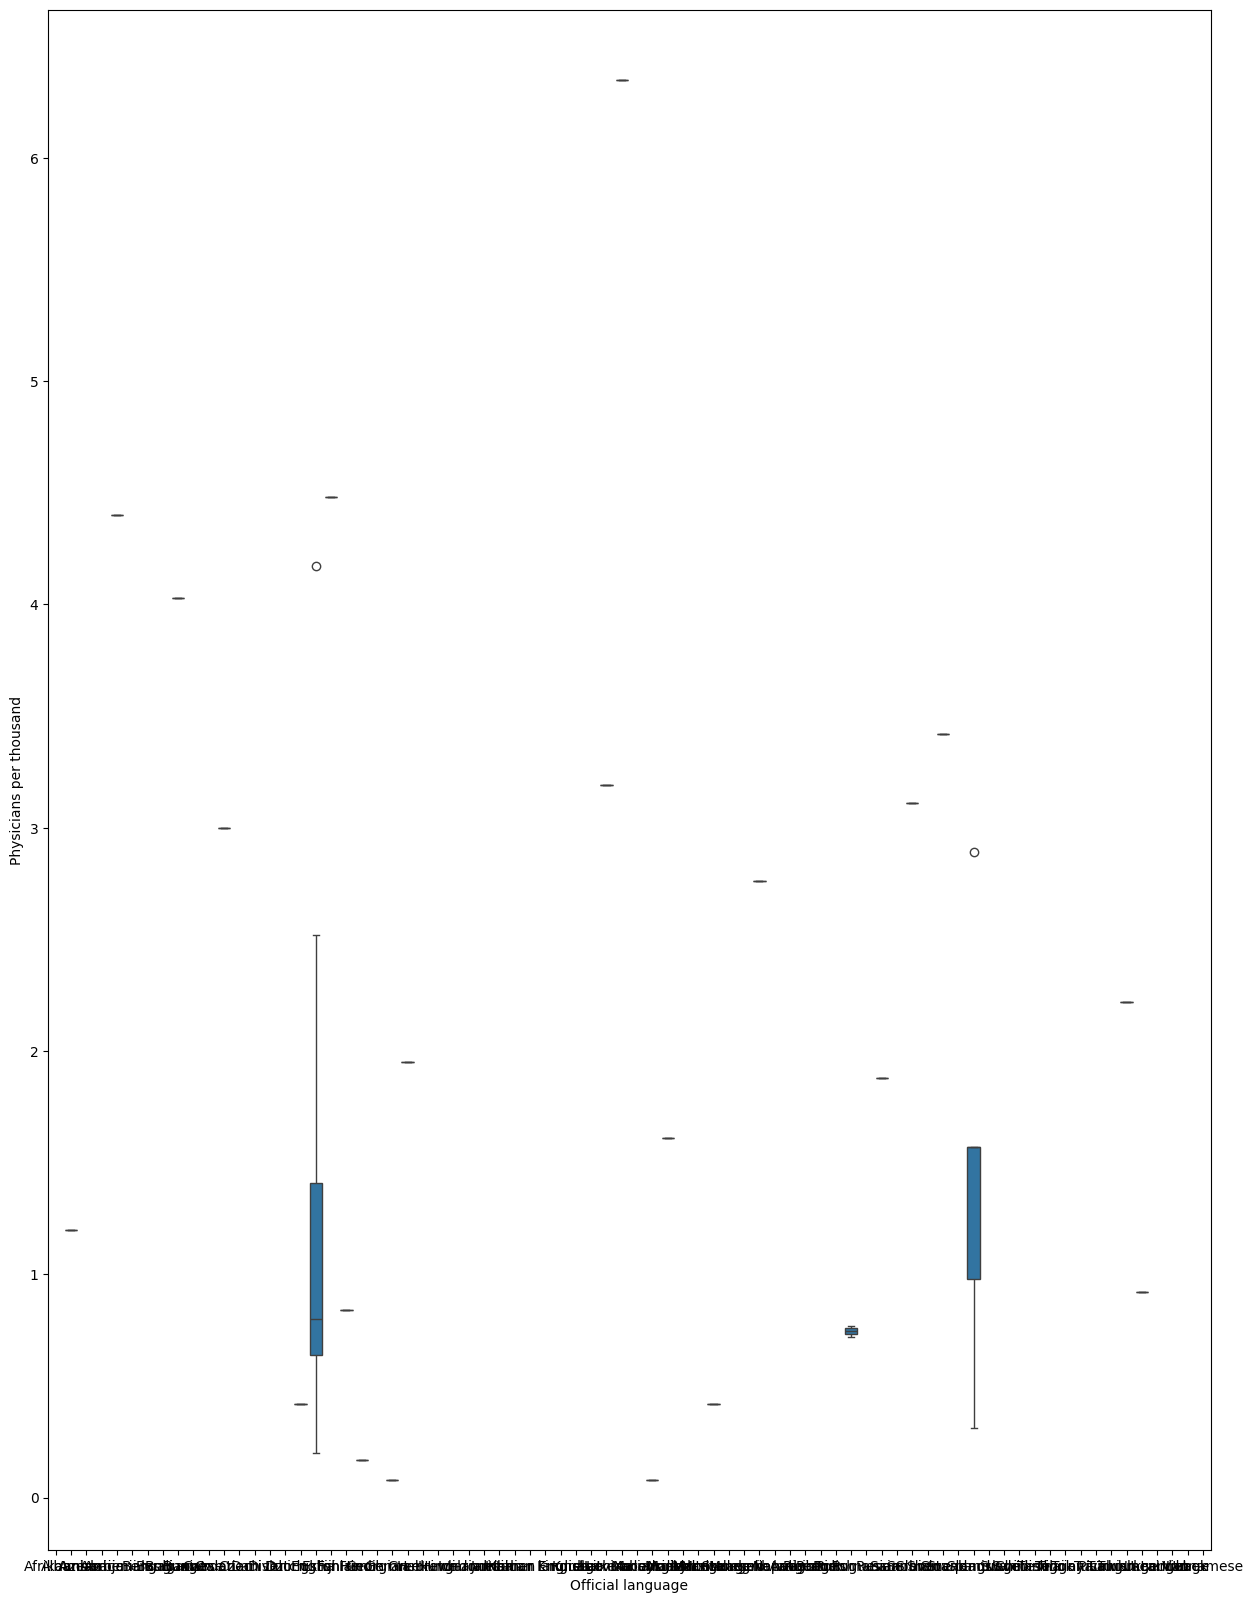

In [583]:
plt.figure(figsize=(15,20))
sns.boxplot(x = df_iqr['Official language'], y = df_iqr['Physicians per thousand'])
plt.show()

Вывод: на моих данных лучше очистил переменные от выборсов именно метод межквартального размаха. Тем не менее, метод межквартального размаха оставил всего 36 записей

Дубликаты

In [584]:
df_duplicates = df[df.duplicated()]
df_duplicates

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude


In [585]:

df = pd.concat((df, df.loc[0:53]))
df_duplicates = df[df.duplicated()]
df_duplicates

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,3.804175e+07,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2.854191e+06,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,4.305305e+07,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,2000.0,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,7.714200e+04,65.1,19.5,36.6,4.59,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,3.182530e+07,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
6,Argentina,17,AR,54.3,2780400.0,105000.0,17.02,54.0,Buenos Aires,201348.0,...,17.6,3.96,4.493871e+07,61.3,10.1,106.3,9.79,41339571.0,-38.416097,-63.616672
7,Armenia,104,AM,58.9,29743.0,49000.0,13.99,374.0,Yerevan,5156.0,...,81.6,4.40,2.957731e+06,55.6,20.9,22.6,16.99,1869848.0,40.069099,45.038189
8,Australia,3,AU,48.2,7741220.0,58000.0,12.60,61.0,Canberra,375908.0,...,19.6,3.68,2.576660e+07,65.5,23.0,47.4,5.27,21844756.0,-25.274398,133.775136
9,Austria,109,AT,32.4,83871.0,21000.0,9.70,43.0,Vienna,61448.0,...,17.9,5.17,8.877067e+06,60.7,25.4,51.4,4.67,5194416.0,47.516231,14.550072
10,Azerbaijan,123,AZ,57.7,86600.0,82000.0,14.00,994.0,Baku,37620.0,...,78.6,3.45,1.002332e+07,66.5,13.0,40.7,5.51,5616165.0,40.143105,47.576927


In [586]:
df = df.drop_duplicates()
df_without_dups = df[df.duplicated()]
df_without_dups

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude


Преобразование признаков

In [587]:
numerical_cols = interpolated_df.select_dtypes(['float64','int64']).columns
numerical_cols

Index(['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Calling Code', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Out of pocket health expenditure', 'Physicians per thousand',
       'Population', 'Population: Labor force participation (%)',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [588]:
interpolated_df['Physicians per thousand'].unique()

array([0.28, 1.2 , 1.72, 3.33, 0.21, 3.96, 4.4 , 3.68, 5.17, 3.45, 1.94,
       0.93, 0.58, 2.48, 5.19, 3.07, 1.12, 0.08, 0.42, 1.59, 2.16, 0.37,
       2.15, 1.61, 4.03, 0.1 , 0.23, 0.77, 0.17, 0.09, 2.61, 0.06, 0.04,
       2.59, 1.98, 2.18, 0.27, 0.12, 2.89, 3.  , 8.42, 1.95, 4.12, 0.07,
       4.01, 0.22, 1.08, 1.56, 2.04, 0.45, 1.57, 0.4 , 4.48, 0.84, 3.81,
       3.27, 0.68, 7.12, 4.25, 0.14, 5.48, 1.41, 0.35, 0.13, 0.8 , 0.31,
       3.41, 0.86, 0.43, 1.58, 0.71, 3.31, 4.62, 3.98, 1.31, 2.41, 2.32,
       3.25, 0.16, 0.2 , 2.58, 1.88, 3.19, 2.1 , 6.35, 3.01, 0.18, 1.51,
       4.56, 2.86, 0.19, 2.53, 2.38, 3.21, 6.56, 2.76, 0.73, 0.75, 3.61,
       3.59, 0.98, 0.38, 3.67, 2.92, 1.18, 1.35, 1.27, 0.6 , 5.12, 2.98,
       2.52, 0.64, 0.66, 0.34, 0.05, 3.11, 0.03, 2.29, 3.42, 3.09, 0.91,
       2.36, 3.87, 1.  , 0.26, 1.21, 4.3 , 1.22, 1.7 , 0.01, 0.81, 0.72,
       0.52, 4.17, 1.3 , 1.85, 2.22, 0.92, 2.99, 2.81, 5.05, 2.37, 0.82,
       1.19])

In [589]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax_scaling = interpolated_df.copy()
df_minmax_scaling[numerical_cols] = scaler_minmax.fit_transform(interpolated_df[numerical_cols])
df_minmax_scaling['Physicians per thousand'].unique()

array([0.03210464, 0.14149822, 0.20332937, 0.39476813, 0.02378121,
       0.46967895, 0.52199762, 0.43638526, 0.61355529, 0.40903686,
       0.2294887 , 0.10939358, 0.06777646, 0.29369798, 0.61593341,
       0.36385256, 0.13198573, 0.00832342, 0.04875149, 0.18787158,
       0.25564804, 0.04280618, 0.25445898, 0.1902497 , 0.47800238,
       0.01070155, 0.02615933, 0.09036861, 0.01902497, 0.00951249,
       0.30915577, 0.0059453 , 0.00356718, 0.30677765, 0.23424495,
       0.25802616, 0.03091558, 0.01307967, 0.34244946, 0.35552913,
       1.        , 0.23067776, 0.48870392, 0.00713436, 0.47562426,
       0.02497027, 0.12722949, 0.1843044 , 0.24137931, 0.05231867,
       0.18549346, 0.04637337, 0.53151011, 0.09869203, 0.45184304,
       0.38763377, 0.07966706, 0.84542212, 0.50416171, 0.01545779,
       0.65041617, 0.16646849, 0.04042806, 0.01426873, 0.09393579,
       0.03567182, 0.40428062, 0.10107015, 0.04994055, 0.18668252,
       0.08323424, 0.39239001, 0.54815696, 0.47205707, 0.15457

In [590]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
df_std_scaler = interpolated_df.copy()
df_std_scaler[numerical_cols] = scaler_std.fit_transform(interpolated_df[numerical_cols])

df_std_scaler['Physicians per thousand'].unique()

array([-0.88842682, -0.33932425, -0.02896193,  0.93196756, -0.93020636,
        1.30798345,  1.57059772,  1.14086528,  2.03017269,  1.00358963,
        0.1023452 , -0.50047392, -0.70937163,  0.42464454,  2.04210971,
        0.7767864 , -0.3870723 , -1.00779694, -0.80486773, -0.10655251,
        0.23365234, -0.83471026,  0.22768383, -0.0946155 ,  1.34976299,
       -0.99585993, -0.91826935, -0.59597002, -0.95408039, -1.00182844,
        0.50223512, -1.01973395, -1.03167097,  0.4902981 ,  0.12621923,
        0.24558935, -0.89439532, -0.98392292,  0.66935329,  0.73500686,
        3.9699372 ,  0.10831371,  1.40347955, -1.01376545,  1.33782598,
       -0.92423786, -0.41094633, -0.12445803,  0.16203027, -0.78696221,
       -0.11848952, -0.81680474,  1.61834577, -0.55419047,  1.21845586,
        0.89615652, -0.64968657,  3.1940314 ,  1.48107013, -0.97198591,
        2.21519639, -0.21398562, -0.84664728, -0.97795441, -0.5780645 ,
       -0.8705213 ,  0.97971561, -0.54225346, -0.79889923, -0.11

In [593]:
category_cols = interpolated_df.select_dtypes('category').columns
category_cols
interpolated_df['Official language'].unique()

['Pashto', 'Albanian', 'Arabic', 'Catalan', 'Portuguese', ..., 'Tuvaluan Language', 'Ukrainian', 'Uzbek', 'Vietnamese', 'Shona']
Length: 75
Categories (76, object): ['Afrikaans', 'Albanian', 'Amharic', 'Arabic', ..., 'Ukrainian', 'Urdu', 'Uzbek', 'Vietnamese']

In [596]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

encoded_features = encoder.fit_transform(df[category_cols])

encoded_columns = encoder.get_feature_names_out(category_cols)
encoded_columns

c:\Users\Eva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Official language_Albanian', 'Official language_Amharic',
       'Official language_Arabic', 'Official language_Armenian',
       'Official language_Azerbaijani language',
       'Official language_Bengali', 'Official language_Bosnian',
       'Official language_Bulgarian', 'Official language_Burmese',
       'Official language_Catalan', 'Official language_Croatian',
       'Official language_Czech', 'Official language_Danish',
       'Official language_Divehi', 'Official language_Dutch',
       'Official language_Dzongkha', 'Official language_English',
       'Official language_Estonian', 'Official language_Fiji Hindi',
       'Official language_French', 'Official language_Georgian',
       'Official language_German', 'Official language_Greek',
       'Official language_Hebrew', 'Official language_Hindi',
       'Official language_Hungarian', 'Official language_Indonesian',
       'Official language_Irish', 'Official language_Italian',
       'Official language_Jamaican Englis

In [597]:
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns) 
df_encoded
     

,Official language_Albanian,Official language_Amharic,Official language_Arabic,Official language_Armenian,Official language_Azerbaijani language,Official language_Bengali,Official language_Bosnian,Official language_Bulgarian,Official language_Burmese,Official language_Catalan,...,Official language_Tigrinya,Official language_Tok Pisin,Official language_Tongan Language,Official language_Turkish,Official language_Turkmen,Official language_Tuvaluan Language,Official language_Ukrainian,Official language_Urdu,Official language_Uzbek,Official language_Vietnamese
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [601]:
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

df_copy = df_copy.drop(columns=category_cols)
df_copy

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Official language_Tigrinya,Official language_Tok Pisin,Official language_Tongan Language,Official language_Turkish,Official language_Turkmen,Official language_Tuvaluan Language,Official language_Ukrainian,Official language_Urdu,Official language_Uzbek,Official language_Vietnamese
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Andorra,164,AD,40.0,468.0,2000.0,7.20,376.0,Andorra la Vella,469.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vanuatu,25,VU,15.3,12189.0,2000.0,29.60,678.0,Port Vila,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,Vietnam,314,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192,Yemen,56,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,Zambia,25,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
